In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

"""
Raw Depth Range: min = 0.212 m, max = 19.983 m
Scaled Depth Range: min = 211 mm, max = 19983 mm
"""

# --- Path to depth map ---
image_path = "/home/aniruth/Desktop/RRC/point-cloud-droid-data/droid/results/depth_raw_mm.png"
# image_path = "/home/aniruth/Downloads/living_room_traj1_frei_png/depth/0.png"
image_path = "/home/aniruth/Desktop/RRC/point-cloud-droid-data/droid/images/depth_mm/00076.png"

# --- Load as 16-bit grayscale ---
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

if img is None:
    print("❌ Error: Could not load image.")
    exit()

# --- Confirm dtype and print range ---
print("✅ Image loaded successfully")
print("Shape:", img.shape)
print("Data type:", img.dtype)
print("Pixel value range:", img.min(), "to", img.max())


✅ Image loaded successfully
Shape: (720, 1280)
Data type: uint16
Pixel value range: 0 to 19995



=== CONVERTED DEPTH IMAGE (in meters) ===
Converted dtype: float32
Converted shape: (720, 1280)
Min depth: 0.000 m
Max depth: 19.995 m
Valid range (nonzero): 0.337 m → 19.995 m


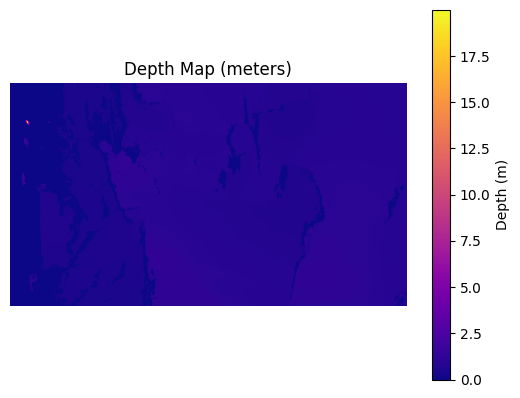

In [40]:
# ------------------------------
# Convert to meters
# ------------------------------
depth_m = img.astype(np.float32) / 1000.0

print("\n=== CONVERTED DEPTH IMAGE (in meters) ===")
print(f"Converted dtype: {depth_m.dtype}")
print(f"Converted shape: {depth_m.shape}")
print(f"Min depth: {np.min(depth_m):.3f} m")
print(f"Max depth: {np.max(depth_m):.3f} m")

nonzero = depth_m[depth_m > 0]
if nonzero.size > 0:
    print(f"Valid range (nonzero): {np.min(nonzero):.3f} m → {np.max(nonzero):.3f} m")
else:
    print("⚠️ No nonzero pixels found (image may be empty).")


plt.imshow(depth_m, cmap="plasma")
plt.title("Depth Map (meters)")
plt.colorbar(label="Depth (m)")
plt.axis("off")
plt.show()